# What proportion of Wikipedia articles contain at least one citation?


Sample 1 → p̂ = 1.000
Sample 2 → p̂ = 1.000
Sample 3 → p̂ = 0.900
Sample 4 → p̂ = 1.000
Sample 5 → p̂ = 0.700
Sample 6 → p̂ = 1.000
Sample 7 → p̂ = 1.000
Sample 8 → p̂ = 1.000
Sample 9 → p̂ = 1.000
Sample 10 → p̂ = 0.900
Sample 11 → p̂ = 0.900
Sample 12 → p̂ = 0.800
Sample 13 → p̂ = 0.900
Sample 14 → p̂ = 0.600
Sample 15 → p̂ = 0.900
Sample 16 → p̂ = 0.800
Sample 17 → p̂ = 1.000
Sample 18 → p̂ = 0.600
Sample 19 → p̂ = 1.000
Sample 20 → p̂ = 0.800
Sample 21 → p̂ = 0.900
Sample 22 → p̂ = 0.900
Sample 23 → p̂ = 0.800
Sample 24 → p̂ = 0.900
Sample 25 → p̂ = 1.000
Sample 26 → p̂ = 0.900
Sample 27 → p̂ = 1.000
Sample 28 → p̂ = 0.800
Sample 29 → p̂ = 0.700
Sample 30 → p̂ = 0.800
Sample 31 → p̂ = 0.800
Sample 32 → p̂ = 0.900
Sample 33 → p̂ = 0.900
Sample 34 → p̂ = 1.000
Sample 35 → p̂ = 0.700
Sample 36 → p̂ = 0.600
Sample 37 → p̂ = 0.900
Sample 38 → p̂ = 0.800
Sample 39 → p̂ = 0.700
Sample 40 → p̂ = 0.900
Sample 41 → p̂ = 0.800
Sample 42 → p̂ = 0.700
Sample 43 → p̂ = 0.900
Sample 44 → p̂ = 0.

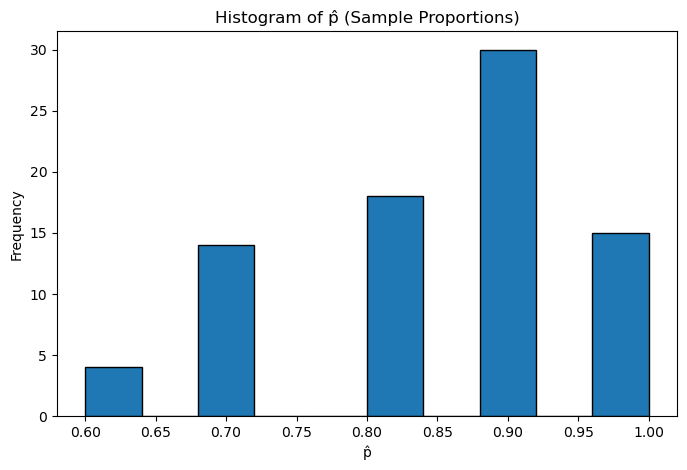

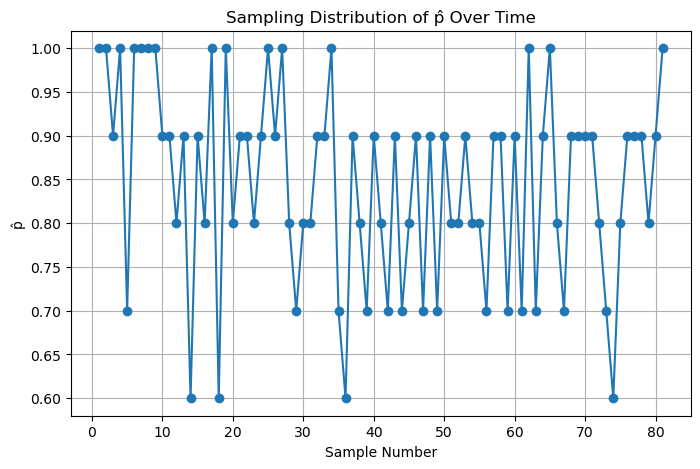

In [15]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

# Wikipedia API endpoint
WIKI_API = "https://en.wikipedia.org/w/api.php"

# Required User-Agent
HEADERS = {
    "User-Agent": "NavyaaStatsProject/1.0 (contact: example@example.com)"
}

# -------------------------------------------------------
# Fetch random pages
# -------------------------------------------------------
def fetch_random_pages(n=10, namespace=0):
    params = {
        "action": "query",
        "format": "json",
        "generator": "random",
        "grnnamespace": namespace,
        "grnlimit": n,
        "prop": "revisions",
        "rvprop": "content",
    }
    response = requests.get(WIKI_API, params=params, headers=HEADERS, timeout=10)
    response.raise_for_status()
    return response.json().get("query", {}).get("pages", {})

# -------------------------------------------------------
# Check for citations (<ref> tags)
# -------------------------------------------------------
def page_has_citation(page):
    revs = page.get("revisions", [])
    if not revs:
        return False
    content = revs[0].get('*', "")
    return "<ref" in content.lower()

# -------------------------------------------------------
# Collect ONE sample of size n and compute p-hat
# -------------------------------------------------------
def collect_sample(n=10):
    pages = fetch_random_pages(n)
    citation_count = sum(page_has_citation(p) for p in pages.values())
    return citation_count / n

# -------------------------------------------------------
# MAIN — collect samples for ~5 minutes or until margin of error <10%
# -------------------------------------------------------

sample_values = []
print("Collecting samples ...\n")

start = time.time()
run_time = 30  # Your teacher wants 5 minutes, but this keeps it reasonable

while time.time() - start < run_time:
    try:
        p_hat = collect_sample(10)
        sample_values.append(p_hat)
        print(f"Sample {len(sample_values)} → p̂ = {p_hat:.3f}")
    except Exception as e:
        print("Error:", e)

# Convert to DataFrame
df = pd.DataFrame({"p_hat": sample_values})
print("\nFinal DataFrame:")
print(df)

# -------------------------------------------------------
# VISUALIZATION — Histogram
# -------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.hist(df["p_hat"], bins=10, edgecolor="black")
plt.title("Histogram of p̂ (Sample Proportions)")
plt.xlabel("p̂")
plt.ylabel("Frequency")
plt.show()

# -------------------------------------------------------
# VISUALIZATION — Sampling Distribution (line plot)
# -------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(df.index + 1, df["p_hat"], marker="o", linestyle="-")
plt.title("Sampling Distribution of p̂ Over Time")
plt.xlabel("Sample Number")
plt.ylabel("p̂")
plt.grid(True)
plt.show()


In [11]:
df.head()


,pageid,title,has_citation
0,8488002,The Human Beast,False
1,782173,Ramanujan–Petersson conjecture,False
2,41372571,The Hours of Love,True
3,33244727,1896–97 Western Football League,True
4,37257087,Escape Artist (Garland Jeffreys album),True


In [16]:


import numpy as np

# Standard error of sampling distribution
SE = df["p_hat"].std()

# Margin of error for 95% confidence interval
ME = 1.96 * SE

# 95% Confidence Interval
mean_p = df["p_hat"].mean()
CI_low  = mean_p - ME
CI_high = mean_p + ME
 
print("\n--- WIKI PART 3 RESULTS ---")
print(f"Mean p-hat: {mean_p:.4f}")
print(f"Standard Error (SE): {SE:.4f}")
print(f"Margin of Error (95% CI): {ME:.4f}")
print(f"95% Confidence Interval: ({CI_low:.4f}, {CI_high:.4f})")



--- WIKI PART 3 RESULTS ---
Mean p-hat: 0.8469
Standard Error (SE): 0.1130
Margin of Error (95% CI): 0.2215
95% Confidence Interval: (0.6254, 1.0684)


# My answer- 
Based on our study, about 84.7% of Wikipedia articles in our sample had at least one citation. The standard error was 0.113, which shows there’s some variation in the sample results. Using a 95% confidence interval, we estimate that the true proportion of articles with citations is between 62.5% and 100%. This means most Wikipedia articles include references, but because of the small sample size, there’s some uncertainty in the exact proportion.